# **AI to classify LinkedIn experiences**


# INDEX
- 1.Importing Libraries
- 2.Loading & Reading The Dataset
- 3.Data Cleaning
- 4.Exploratory data analysis (EDA)
- 5.Feature Selection and Feature Engineering
- 6.Splitting
- 7.Modelling
- 8.Checking for Overfitting
- 9.Predicting result on a given Data

In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Importing Libraries

In [149]:
import pandas as pd
import pickle
import numpy as np
import sklearn
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

# Importing libraries to check the different accuracy measures for ML Algos
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,binarize

# Importing tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# Importing libraries for removing stop words
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer

# Importing libraries for pre-processing
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

# Importing libraries for creating Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# Importing ML Algos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Importing libraries to check for Overfitting of our Model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# 2. Loading & Reading The Dataset

In [150]:
df=pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/dataset.pkl")

In [151]:
df.shape

(9000, 8)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 548398365_0 to 70320782_1
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   companyName  9000 non-null   object 
 1   companyUrl   8099 non-null   object 
 2   jobTitle     8999 non-null   object 
 3   dateRange    8990 non-null   object 
 4   location     6362 non-null   object 
 5   description  6453 non-null   object 
 6   logoUrl      7921 non-null   object 
 7   label        5651 non-null   float64
dtypes: float64(1), object(7)
memory usage: 632.8+ KB


In [153]:
# Displaying all the Columns of our dataset
list(df.columns.values)

['companyName',
 'companyUrl',
 'jobTitle',
 'dateRange',
 'location',
 'description',
 'logoUrl',
 'label']

In [154]:
# Describe the entire dataset
df.describe()

,label
count,5651.000000
mean,1.208282
std,1.356456
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,4.000000


# 3. Data Cleaning

In [155]:
df.head()

,companyName,companyUrl,jobTitle,dateRange,location,description,logoUrl,label
id,,,,,,,,
548398365_0,TEHTRIS,https://www.linkedin.com/company/tehtris/,R&D Cybersecurity Consultant,oct. 2021 – Aujourd’hui,"Bordeaux, Nouvelle-Aquitaine, France",None,https://media-exp1.licdn.com/dms/image/C4D0BAQ...,NaN
548398365_1,CHEOPS TECHNOLOGY,https://www.linkedin.com/company/cheops-techno...,Ingénieur en data mining,sept. 2020 – sept. 2021,"Bordeaux, Nouvelle-Aquitaine, France",None,https://media-exp1.licdn.com/dms/image/C560BAQ...,2.0
551303934_0,ALTEN,https://www.linkedin.com/company/alten/,Stagiaire ingénieur en intelligence artificiel...,juil. 2021 – Aujourd’hui,"Rennes, Bretagne, France",Conception et programmation pour une plateform...,https://media-exp1.licdn.com/dms/image/C4D0BAQ...,4.0
551303934_1,FRANCE SECURITE,https://www.linkedin.com/company/france-securite/,Stagiaire en développement logiciel,juin 2019 – août 2019,"Bordeaux, Aquitaine, France",Développement et mises à jour d’applications c...,https://media-exp1.licdn.com/dms/image/C4D0BAQ...,2.0
551303934_2,OASU (Observatoire Aquitain des Sciences de l'...,None,Stagiaire en développement Web,avr. 2018 – juin 2018,"Bordeaux, Aquitaine, France",Création et évolution d’une application Web d’...,,1.0


### Display the Null values percentage against every columns (compare to the total number of records)

In [156]:
i=0
l = list(df.isnull().sum() * 100 / len(df))
length = len(l)
while i<length:
  if l[i] != 0.0:
    print(df.columns[i]," - ",(l[i]),"% null")
  i+=1

companyUrl  -  10.011111111111111 % null
jobTitle  -  0.011111111111111112 % null
dateRange  -  0.1111111111111111 % null
location  -  29.31111111111111 % null
description  -  28.3 % null
logoUrl  -  11.988888888888889 % null
label  -  37.21111111111111 % null


In [157]:
df.label.unique()

array([nan,  2.,  4.,  1.,  0.,  3.])

### Removing Rows with label NAN

In [158]:
df.dropna(subset= ['label'], inplace=True)

In [159]:
df.label.unique()

array([2., 4., 1., 0., 3.])

In [160]:
df.shape

(5651, 8)

### Replace **None** in Description column with **empty string**

In [161]:
df2 = df[['description']] = df[['description']].fillna('')
df2.head()

,description
id,
548398365_1,
551303934_0,Conception et programmation pour une plateform...
551303934_1,Développement et mises à jour d’applications c...
551303934_2,Création et évolution d’une application Web d’...
551303934_3,"Portage d’une application en PHP 7, mises à jo..."


In [162]:
df.head()

,companyName,companyUrl,jobTitle,dateRange,location,description,logoUrl,label
id,,,,,,,,
548398365_1,CHEOPS TECHNOLOGY,https://www.linkedin.com/company/cheops-techno...,Ingénieur en data mining,sept. 2020 – sept. 2021,"Bordeaux, Nouvelle-Aquitaine, France",,https://media-exp1.licdn.com/dms/image/C560BAQ...,2.0
551303934_0,ALTEN,https://www.linkedin.com/company/alten/,Stagiaire ingénieur en intelligence artificiel...,juil. 2021 – Aujourd’hui,"Rennes, Bretagne, France",Conception et programmation pour une plateform...,https://media-exp1.licdn.com/dms/image/C4D0BAQ...,4.0
551303934_1,FRANCE SECURITE,https://www.linkedin.com/company/france-securite/,Stagiaire en développement logiciel,juin 2019 – août 2019,"Bordeaux, Aquitaine, France",Développement et mises à jour d’applications c...,https://media-exp1.licdn.com/dms/image/C4D0BAQ...,2.0
551303934_2,OASU (Observatoire Aquitain des Sciences de l'...,None,Stagiaire en développement Web,avr. 2018 – juin 2018,"Bordeaux, Aquitaine, France",Création et évolution d’une application Web d’...,,1.0
551303934_3,ADDEO,https://www.linkedin.com/company/addeo/,Stagiaire en développement Web,avr. 2016 – juin 2016,"Bordeaux, Aquitaine, France","Portage d’une application en PHP 7, mises à jo...",https://media-exp1.licdn.com/dms/image/C4E0BAQ...,0.0


### Concatenating columns **jobTitle** and **description** as **jobDescription**

In [163]:
df["jobDescription"] = df[['jobTitle', 'description']].agg(' '.join, axis=1)

In [164]:
df.head()

,companyName,companyUrl,jobTitle,dateRange,location,description,logoUrl,label,jobDescription
id,,,,,,,,,
548398365_1,CHEOPS TECHNOLOGY,https://www.linkedin.com/company/cheops-techno...,Ingénieur en data mining,sept. 2020 – sept. 2021,"Bordeaux, Nouvelle-Aquitaine, France",,https://media-exp1.licdn.com/dms/image/C560BAQ...,2.0,Ingénieur en data mining
551303934_0,ALTEN,https://www.linkedin.com/company/alten/,Stagiaire ingénieur en intelligence artificiel...,juil. 2021 – Aujourd’hui,"Rennes, Bretagne, France",Conception et programmation pour une plateform...,https://media-exp1.licdn.com/dms/image/C4D0BAQ...,4.0,Stagiaire ingénieur en intelligence artificiel...
551303934_1,FRANCE SECURITE,https://www.linkedin.com/company/france-securite/,Stagiaire en développement logiciel,juin 2019 – août 2019,"Bordeaux, Aquitaine, France",Développement et mises à jour d’applications c...,https://media-exp1.licdn.com/dms/image/C4D0BAQ...,2.0,Stagiaire en développement logiciel Développem...
551303934_2,OASU (Observatoire Aquitain des Sciences de l'...,None,Stagiaire en développement Web,avr. 2018 – juin 2018,"Bordeaux, Aquitaine, France",Création et évolution d’une application Web d’...,,1.0,Stagiaire en développement Web Création et évo...
551303934_3,ADDEO,https://www.linkedin.com/company/addeo/,Stagiaire en développement Web,avr. 2016 – juin 2016,"Bordeaux, Aquitaine, France","Portage d’une application en PHP 7, mises à jo...",https://media-exp1.licdn.com/dms/image/C4E0BAQ...,0.0,Stagiaire en développement Web Portage d’une a...


### **Converting jobDescription column into lowercase**

In [165]:
low = lambda s:s.lower()
df['jobDescription']=df['jobDescription'].apply(low)
df.head()

,companyName,companyUrl,jobTitle,dateRange,location,description,logoUrl,label,jobDescription
id,,,,,,,,,
548398365_1,CHEOPS TECHNOLOGY,https://www.linkedin.com/company/cheops-techno...,Ingénieur en data mining,sept. 2020 – sept. 2021,"Bordeaux, Nouvelle-Aquitaine, France",,https://media-exp1.licdn.com/dms/image/C560BAQ...,2.0,ingénieur en data mining
551303934_0,ALTEN,https://www.linkedin.com/company/alten/,Stagiaire ingénieur en intelligence artificiel...,juil. 2021 – Aujourd’hui,"Rennes, Bretagne, France",Conception et programmation pour une plateform...,https://media-exp1.licdn.com/dms/image/C4D0BAQ...,4.0,stagiaire ingénieur en intelligence artificiel...
551303934_1,FRANCE SECURITE,https://www.linkedin.com/company/france-securite/,Stagiaire en développement logiciel,juin 2019 – août 2019,"Bordeaux, Aquitaine, France",Développement et mises à jour d’applications c...,https://media-exp1.licdn.com/dms/image/C4D0BAQ...,2.0,stagiaire en développement logiciel développem...
551303934_2,OASU (Observatoire Aquitain des Sciences de l'...,None,Stagiaire en développement Web,avr. 2018 – juin 2018,"Bordeaux, Aquitaine, France",Création et évolution d’une application Web d’...,,1.0,stagiaire en développement web création et évo...
551303934_3,ADDEO,https://www.linkedin.com/company/addeo/,Stagiaire en développement Web,avr. 2016 – juin 2016,"Bordeaux, Aquitaine, France","Portage d’une application en PHP 7, mises à jo...",https://media-exp1.licdn.com/dms/image/C4E0BAQ...,0.0,stagiaire en développement web portage d’une a...


### Removing stopwords

In [166]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [167]:
set(stopwords.words('french'))

{'ai',
 'aie',
 'aient',
 'aies',
 'ait',
 'as',
 'au',
 'aura',
 'aurai',
 'auraient',
 'aurais',
 'aurait',
 'auras',
 'aurez',
 'auriez',
 'aurions',
 'aurons',
 'auront',
 'aux',
 'avaient',
 'avais',
 'avait',
 'avec',
 'avez',
 'aviez',
 'avions',
 'avons',
 'ayant',
 'ayante',
 'ayantes',
 'ayants',
 'ayez',
 'ayons',
 'c',
 'ce',
 'ces',
 'd',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'es',
 'est',
 'et',
 'eu',
 'eue',
 'eues',
 'eurent',
 'eus',
 'eusse',
 'eussent',
 'eusses',
 'eussiez',
 'eussions',
 'eut',
 'eux',
 'eûmes',
 'eût',
 'eûtes',
 'furent',
 'fus',
 'fusse',
 'fussent',
 'fusses',
 'fussiez',
 'fussions',
 'fut',
 'fûmes',
 'fût',
 'fûtes',
 'il',
 'ils',
 'j',
 'je',
 'l',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'm',
 'ma',
 'mais',
 'me',
 'mes',
 'moi',
 'mon',
 'même',
 'n',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ont',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 's',
 'sa',
 'se',
 'sera',
 'serai',
 'seraient',
 'serais',
 'serait',


In [168]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [169]:
# Removing the Stopwords using Lambda functions
stop_wordsFr= stopwords.words('french')
df['jobDescription_without_stopwords'] = df['jobDescription'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_wordsFr)]))
stop_wordsEn = stopwords.words('english')
df['jobDescription_without_stopwords'] = df['jobDescription_without_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_wordsEn)]))

In [170]:
df.head()

,companyName,companyUrl,jobTitle,dateRange,location,description,logoUrl,label,jobDescription,jobDescription_without_stopwords
id,,,,,,,,,,
548398365_1,CHEOPS TECHNOLOGY,https://www.linkedin.com/company/cheops-techno...,Ingénieur en data mining,sept. 2020 – sept. 2021,"Bordeaux, Nouvelle-Aquitaine, France",,https://media-exp1.licdn.com/dms/image/C560BAQ...,2.0,ingénieur en data mining,ingénieur data mining
551303934_0,ALTEN,https://www.linkedin.com/company/alten/,Stagiaire ingénieur en intelligence artificiel...,juil. 2021 – Aujourd’hui,"Rennes, Bretagne, France",Conception et programmation pour une plateform...,https://media-exp1.licdn.com/dms/image/C4D0BAQ...,4.0,stagiaire ingénieur en intelligence artificiel...,stagiaire ingénieur intelligence artificielle ...
551303934_1,FRANCE SECURITE,https://www.linkedin.com/company/france-securite/,Stagiaire en développement logiciel,juin 2019 – août 2019,"Bordeaux, Aquitaine, France",Développement et mises à jour d’applications c...,https://media-exp1.licdn.com/dms/image/C4D0BAQ...,2.0,stagiaire en développement logiciel développem...,stagiaire développement logiciel développement...
551303934_2,OASU (Observatoire Aquitain des Sciences de l'...,None,Stagiaire en développement Web,avr. 2018 – juin 2018,"Bordeaux, Aquitaine, France",Création et évolution d’une application Web d’...,,1.0,stagiaire en développement web création et évo...,stagiaire développement web création évolution...
551303934_3,ADDEO,https://www.linkedin.com/company/addeo/,Stagiaire en développement Web,avr. 2016 – juin 2016,"Bordeaux, Aquitaine, France","Portage d’une application en PHP 7, mises à jo...",https://media-exp1.licdn.com/dms/image/C4E0BAQ...,0.0,stagiaire en développement web portage d’une a...,stagiaire développement web portage d’une appl...


### **Removing unecessary columns**

In [171]:
df = df.drop(['companyUrl','dateRange','location','logoUrl','jobDescription'], axis=1)

In [172]:
df.head()

,companyName,jobTitle,description,label,jobDescription_without_stopwords
id,,,,,
548398365_1,CHEOPS TECHNOLOGY,Ingénieur en data mining,,2.0,ingénieur data mining
551303934_0,ALTEN,Stagiaire ingénieur en intelligence artificiel...,Conception et programmation pour une plateform...,4.0,stagiaire ingénieur intelligence artificielle ...
551303934_1,FRANCE SECURITE,Stagiaire en développement logiciel,Développement et mises à jour d’applications c...,2.0,stagiaire développement logiciel développement...
551303934_2,OASU (Observatoire Aquitain des Sciences de l'...,Stagiaire en développement Web,Création et évolution d’une application Web d’...,1.0,stagiaire développement web création évolution...
551303934_3,ADDEO,Stagiaire en développement Web,"Portage d’une application en PHP 7, mises à jo...",0.0,stagiaire développement web portage d’une appl...


### **Relabelling the label column**

In [173]:
df['label']=df['label'].replace([0.0,1.0,2.0],0.0)
df['label']=df['label'].replace([3.0,4.0],1.0)
df.head()

,companyName,jobTitle,description,label,jobDescription_without_stopwords
id,,,,,
548398365_1,CHEOPS TECHNOLOGY,Ingénieur en data mining,,0.0,ingénieur data mining
551303934_0,ALTEN,Stagiaire ingénieur en intelligence artificiel...,Conception et programmation pour une plateform...,1.0,stagiaire ingénieur intelligence artificielle ...
551303934_1,FRANCE SECURITE,Stagiaire en développement logiciel,Développement et mises à jour d’applications c...,0.0,stagiaire développement logiciel développement...
551303934_2,OASU (Observatoire Aquitain des Sciences de l'...,Stagiaire en développement Web,Création et évolution d’une application Web d’...,0.0,stagiaire développement web création évolution...
551303934_3,ADDEO,Stagiaire en développement Web,"Portage d’une application en PHP 7, mises à jo...",0.0,stagiaire développement web portage d’une appl...


# 4. Exploratory data analysis (EDA)

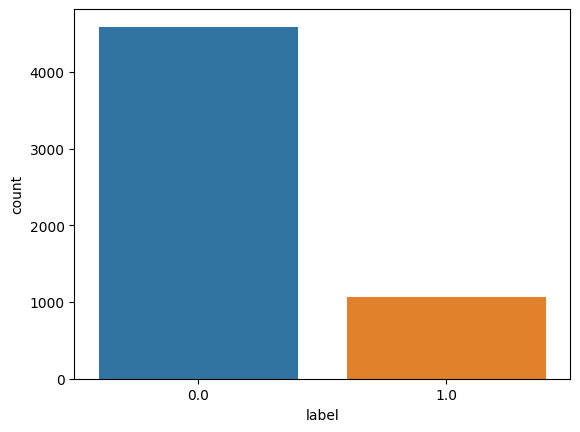

In [174]:
#Count plot to visualize the 'label' column
sns.countplot(data=df,x='label')
plt.show()

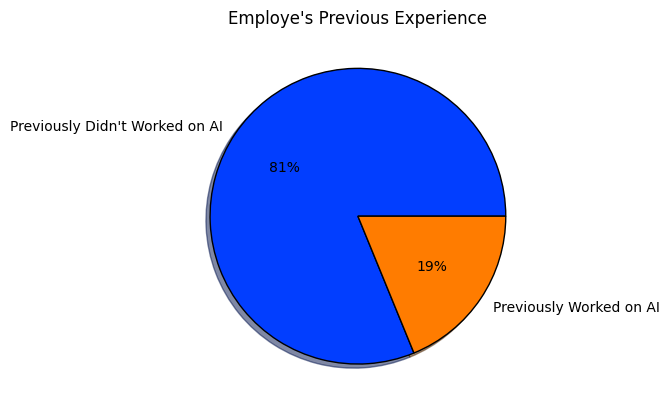

In [175]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

labels = ["Previously Didn't Worked on AI","Previously Worked on AI"]
# plotting data on chart
plt.pie(df.label.value_counts(),labels=labels,shadow=True,wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1,
                      'antialiased': True}, colors=palette_color,autopct='%.0f%%')

plt.title("Employe's Previous Experience")
# displaying chart
plt.show()

# 5. Feature Selection and Feature Engineering

In [176]:
df.head()

,companyName,jobTitle,description,label,jobDescription_without_stopwords
id,,,,,
548398365_1,CHEOPS TECHNOLOGY,Ingénieur en data mining,,0.0,ingénieur data mining
551303934_0,ALTEN,Stagiaire ingénieur en intelligence artificiel...,Conception et programmation pour une plateform...,1.0,stagiaire ingénieur intelligence artificielle ...
551303934_1,FRANCE SECURITE,Stagiaire en développement logiciel,Développement et mises à jour d’applications c...,0.0,stagiaire développement logiciel développement...
551303934_2,OASU (Observatoire Aquitain des Sciences de l'...,Stagiaire en développement Web,Création et évolution d’une application Web d’...,0.0,stagiaire développement web création évolution...
551303934_3,ADDEO,Stagiaire en développement Web,"Portage d’une application en PHP 7, mises à jo...",0.0,stagiaire développement web portage d’une appl...


In [177]:
df_label_desc = df[['jobDescription_without_stopwords', 'label']]
df_label_desc.shape

(5651, 2)

In [178]:
df_label_desc.head()

,jobDescription_without_stopwords,label
id,,
548398365_1,ingénieur data mining,0.0
551303934_0,stagiaire ingénieur intelligence artificielle ...,1.0
551303934_1,stagiaire développement logiciel développement...,0.0
551303934_2,stagiaire développement web création évolution...,0.0
551303934_3,stagiaire développement web portage d’une appl...,0.0


In [179]:
#Storing the Columns in 2 different as we have to perform Leme
X=df_label_desc.jobDescription_without_stopwords
Y=df_label_desc.label

In [180]:
df_label_desc['jobDescription_without_stopwords'].head()

id
548398365_1                                ingénieur data mining
551303934_0    stagiaire ingénieur intelligence artificielle ...
551303934_1    stagiaire développement logiciel développement...
551303934_2    stagiaire développement web création évolution...
551303934_3    stagiaire développement web portage d’une appl...
Name: jobDescription_without_stopwords, dtype: object

### Lemmatization

In [181]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer object
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize a sentence
def lemmatize_sentence(sentence):
    tokens = nltk.word_tokenize(sentence)
    lemmatized_tokens = []
    for token in tokens:
        lemmatized_token = lemmatizer.lemmatize(token)
        lemmatized_tokens.append(lemmatized_token)
    lemmatized_sentence = ' '.join(lemmatized_tokens)
    return lemmatized_sentence

# Lemmatize the feature column
df_label_desc['jobDescription_without_stopwords'] = df_label_desc['jobDescription_without_stopwords'].apply(lemmatize_sentence)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-181-b52297bbdf1b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_desc['jobDescription_without_stopwords'] = df_label_desc['jobDescription_without_stopwords'].apply(lemmatize_sentence)


In [182]:
df_label_desc['jobDescription_without_stopwords'].head()

id
548398365_1                                ingénieur data mining
551303934_0    stagiaire ingénieur intelligence artificielle ...
551303934_1    stagiaire développement logiciel développement...
551303934_2    stagiaire développement web création évolution...
551303934_3    stagiaire développement web portage d ’ une ap...
Name: jobDescription_without_stopwords, dtype: object

### **Creating bag of words**

In [183]:
X = df_label_desc['jobDescription_without_stopwords']
Y = df_label_desc['label']

In [184]:
cv = CountVectorizer(stop_words=None,max_features=120)

In [185]:
# Tokanise and vectorising our whole testing data
X_vectors = cv.fit_transform(X)

# 6. Splitting

In [186]:
X_train, X_test, Y_train, Y_test = train_test_split( X_vectors, Y, test_size=0.35, random_state=42)

In [187]:
type(Y_test),type(Y_train)

(pandas.core.series.Series, pandas.core.series.Series)

In [188]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((3673, 120), (1978, 120), (3673,), (1978,))

# 7. Modelling

In [189]:
# This function will help us to print all the different Accuracy measures
def evalClassModel(model, Y_test, Y_pred_class, plot=False):
    # Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(Y_test, Y_pred_class))
    print('Null accuracy:\n', Y_test.value_counts(normalize=True)*100)
    # calculate the percentage of ones
    print('Percentage of ones:', Y_test.mean())
    # calculate the percentage of zeros
    print('Percentage of zeros:', 1-Y_test.mean())
    # Comparing the first 20 Actual and Predicted response values
    print('True:', Y_test.values[0:20])
    print('Pred:', Y_pred_class[0:20])

    # Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(Y_test, Y_pred_class)
    # [row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    # visualize Confusion Matrix
    sns.heatmap(confusion, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Metrics computed from a confusion matrix
    # Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(Y_test, Y_pred_class)
    print('Classification Accuracy:', accuracy)
    # Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - accuracy)
    # False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    # Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(Y_test, Y_pred_class))
    #print('AUC Score:', metrics.roc_auc_score(Y_test, Y_pred_class))
    # calculate cross-validated AUC
    # print('Cross-validated AUC:', cross_val_score(model,X, Y, cv=10, scoring='roc_auc').mean())
    f1 = f1_score(Y_test, Y_pred_class)
    print("F1 score :- ", f1)
    return f1


### Logistic Regression

In [190]:
methodDict = {}
# F1_score = ()

########### Logistic Regression ###############
Accuracy: 0.9342770475227502
Null accuracy:
 0.0    81.294237
1.0    18.705763
Name: label, dtype: float64
Percentage of ones: 0.1870576339737108
Percentage of zeros: 0.8129423660262892
True: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
Pred: [0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]


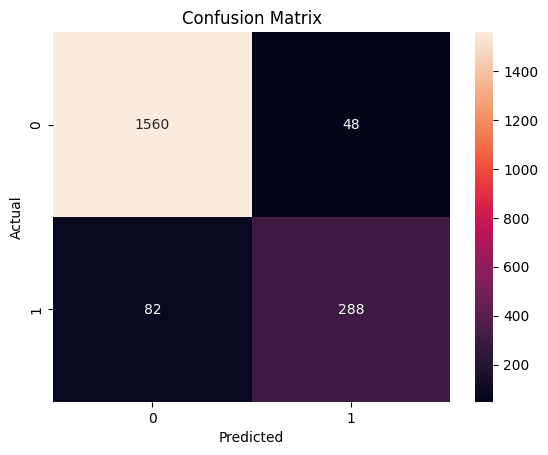

Classification Accuracy: 0.9342770475227502
Classification Error: 0.0657229524772498
False Positive Rate: 0.029850746268656716
Precision: 0.8571428571428571
F1 score :-  0.8158640226628895
Mean Squared Error: 0.06572295247724974


In [191]:
def logisticsRegression():
    logreg=LogisticRegression()
    logreg.fit(X_train,Y_train)
    Y_pred_class=logreg.predict(X_test)
    print('########### Logistic Regression ###############')
    f1_score = evalClassModel(logreg, Y_test, Y_pred_class, True)
    type(Y_test),type(Y_pred_class)
    # Data for final graph
    methodDict['Log.Regres.']=f1_score*100
    # Evaluate the model performance (e.g., using mean squared error)
    mse = ((Y_pred_class - Y_test) ** 2).mean()
    print("Mean Squared Error:", mse)
logisticsRegression()


In [192]:
# from sklearn import svm
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Create an SVC model
# model = svm.SVC()

# # Train the model
# model.fit(X_train, Y_train)

# # Make predictions on the test set
# Y_pred_class = model.predict(X_test)

# f1_score = evalClassModel(model, Y_test, Y_pred_class, True)
# # Data for final graph
# # methodDict['Log.Regres.']=f1_score*100
# # Evaluate the model performance (e.g., using mean squared error)
# mse = ((Y_pred_class - Y_test) ** 2).mean()
# print("Mean Squared Error:", mse)

# # Evaluate the model
# accuracy = accuracy_score(Y_test, Y_pred_class)
# print("Accuracy:", accuracy)


### K-Nearest Neighbour

########### KNeighborsClassifier ###############
Accuracy: 0.8892821031344793
Null accuracy:
 0.0    81.294237
1.0    18.705763
Name: label, dtype: float64
Percentage of ones: 0.1870576339737108
Percentage of zeros: 0.8129423660262892
True: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
Pred: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]


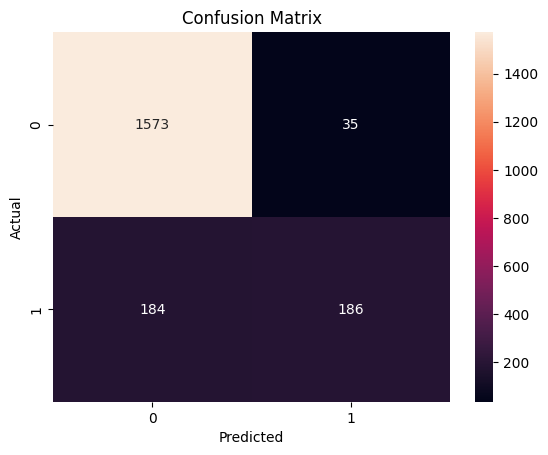

Classification Accuracy: 0.8892821031344793
Classification Error: 0.11071789686552069
False Positive Rate: 0.021766169154228857
Precision: 0.8416289592760181
F1 score :-  0.6294416243654822
Mean Squared Error: 0.11071789686552073


In [193]:
def Knn():
    knn = KNeighborsClassifier(n_neighbors=5)
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'disance']
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, Y_train)
    Y_pred_class = knn.predict(X_test)
    print('########### KNeighborsClassifier ###############')
    f1_score = evalClassModel(knn, Y_test, Y_pred_class, True)
    # Data for final graph
    methodDict['KNN'] = f1_score * 100
    # Evaluate the model performance (e.g., using mean squared error)
    mse = ((Y_pred_class - Y_test) ** 2).mean()
    print("Mean Squared Error:", mse)

Knn()

### Decision Tree Classifier

########### Tree classifier ###############
Accuracy: 0.8387259858442871
Null accuracy:
 0.0    81.294237
1.0    18.705763
Name: label, dtype: float64
Percentage of ones: 0.1870576339737108
Percentage of zeros: 0.8129423660262892
True: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
Pred: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


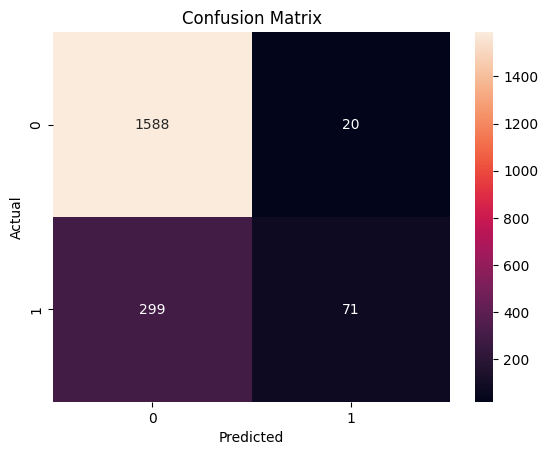

Classification Accuracy: 0.8387259858442871
Classification Error: 0.16127401415571285
False Positive Rate: 0.012437810945273632
Precision: 0.7802197802197802
F1 score :-  0.3080260303687636
Mean Squared Error: 0.16127401415571285


In [194]:
def treeClassifier():
    tree = DecisionTreeClassifier()
    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(
        max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, Y_train)
    Y_pred_class = tree.predict(X_test)
    print('########### Tree classifier ###############')
    f1_score = evalClassModel(tree, Y_test, Y_pred_class, True)
    # Data for final graph
    methodDict['Tree clas.'] = f1_score * 100
    # Evaluate the model performance (e.g., using mean squared error)
    mse = ((Y_pred_class - Y_test) ** 2).mean()
    print("Mean Squared Error:", mse)

treeClassifier()

### Random Forest Classifier

########### Random Forests ###############
Accuracy: 0.9428715874620829
Null accuracy:
 0.0    81.294237
1.0    18.705763
Name: label, dtype: float64
Percentage of ones: 0.1870576339737108
Percentage of zeros: 0.8129423660262892
True: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
Pred: [0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]


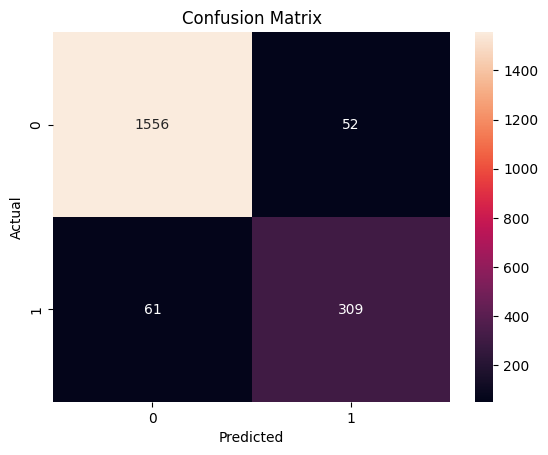

Classification Accuracy: 0.9428715874620829
Classification Error: 0.05712841253791712
False Positive Rate: 0.03233830845771144
Precision: 0.8559556786703602
F1 score :-  0.8454172366621067
Mean Squared Error: 0.05712841253791709


In [195]:
def randomForest():
    # Building and fitting my_forest
    forest = RandomForestClassifier(
        max_depth=None, min_samples_leaf=8, min_samples_split=2, n_estimators=20, random_state=1)
    my_forest = forest.fit(X_train, Y_train)
    # make class predictions for the testing set
    Y_pred_class = my_forest.predict(X_test)
    print('########### Random Forests ###############')
    f1_score = evalClassModel(my_forest, Y_test, Y_pred_class, True)
    # Data for final graph
    methodDict['R. Forest'] = f1_score * 100
    # Evaluate the model performance (e.g., using mean squared error)
    mse = ((Y_pred_class - Y_test) ** 2).mean()
    print("Mean Squared Error:", mse)

randomForest()

Accuracy: 0.9206268958543984
Null accuracy:
 0.0    81.294237
1.0    18.705763
Name: label, dtype: float64
Percentage of ones: 0.1870576339737108
Percentage of zeros: 0.8129423660262892
True: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
Pred: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]


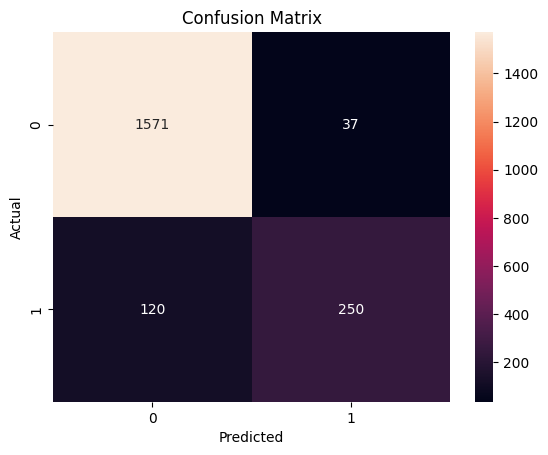

Classification Accuracy: 0.9206268958543984
Classification Error: 0.07937310414560161
False Positive Rate: 0.023009950248756218
Precision: 0.8710801393728222
F1 score :-  0.76103500761035
Mean Squared Error: 0.07937310414560161
Accuracy: 0.9206268958543984


In [196]:
from sklearn import svm

# Create an SVC model
model = svm.SVC()

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_class = model.predict(X_test)

f1_score = evalClassModel(model, Y_test, Y_pred_class, True)
# Data for final graph
# methodDict['Log.Regres.']=f1_score*100
# Evaluate the model performance (e.g., using mean squared error)
mse = ((Y_pred_class - Y_test) ** 2).mean()
print("Mean Squared Error:", mse)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred_class)
print("Accuracy:", accuracy)


## Ploting the Classification Accuracy for every Algo

### Since our labels are not balanced, we will go for F1 Score over Accuracy as our measuring Factor

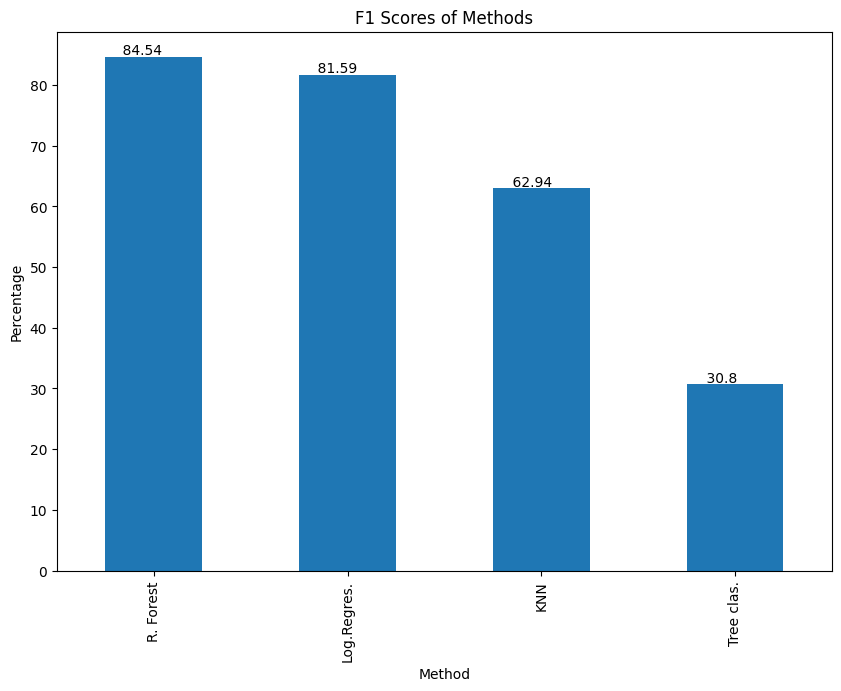

In [197]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(10, 7))
    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate("    "+str(round(p.get_height(), 2)),
                    (p.get_x()*1.005, p.get_height()*1.005))
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('F1 Scores of Methods')
    plt.show()

plotSuccess()

# 8. Checking for Overfitting

## Since our best model is Logistic Regression we are check for overfitting in it

###  Checking the Mean Absolute Error

In [198]:
mae_train=[]
mae_test=[]
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
y_train_pred=logreg.predict(X_train)
y_test_pred=logreg.predict(X_test)
mae_train.append(mean_absolute_error(Y_train, y_train_pred))
mae_test.append(mean_absolute_error(Y_test, y_test_pred))

In [199]:
mae_train,mae_test

([0.0558126871766948], [0.06572295247724974])

### k-fold cross-validation

In [200]:
# Assuming you have your input features 'X' and target variable 'Y' defined

# Create an instance of the model you want to evaluate
model = RandomForestClassifier(n_estimators=20)

# Define the number of folds for cross-validation
num_folds = 5

# Create a KFold object
kf = KFold(n_splits=num_folds)

# Perform k-fold cross-validation
scores = cross_val_score(model, X_train, Y_train, cv=kf, scoring='r2')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the average score
avg_score = scores.mean()
print("Average Score:", avg_score)


Cross-Validation Scores: [0.59628201 0.59183673 0.56599578 0.57256972 0.6323502 ]
Average Score: 0.5918068891385962


# 9. Predicting result on a given Data

### We will be using a Random Forest Classifier as it is providing highest value of F1 Score

In [201]:
data=pd.read_excel("/content/drive/MyDrive/Checking_Data_AI_LinkedIn.xls")

In [202]:
data.head(11)

,Job_Description,Actual_label
0,Architecte d'IA : Conçoit et met en place l'in...,1
1,Chercheur en IA : Mène des recherches avancées...,1
2,Éthicien(ne) de l'IA : Évalue et analyse les i...,1
3,Vendeur/Vendeuse : Responsable de l'accueil et...,0
4,Secrétaire : Chargé(e) de l'organisation et de...,0
5,Ingénieur(e) en informatique : Responsable de ...,0
6,Serveur/Serveuse : Responsable du service et d...,0
7,Mécanicien(ne) automobile : Spécialiste de la ...,0
8,Enseignant(e) : Chargé(e) d'instruire et d'édu...,0


In [203]:
data['Job_Description'] = data['Job_Description'].apply(lemmatize_sentence)
data.head()

,Job_Description,Actual_label
0,Architecte d'IA : Conçoit et met en place l'in...,1
1,Chercheur en IA : Mène de recherches avancées ...,1
2,Éthicien ( ne ) de l'IA : Évalue et analyse le...,1
3,Vendeur/Vendeuse : Responsable de l'accueil et...,0
4,Secrétaire : Chargé ( e ) de l'organisation et...,0


In [204]:
X_check=data.Job_Description

In [205]:
#Creating bag of Words
cv = CountVectorizer(stop_words=None)
X_check_vectors=cv.fit_transform(X_check)

In [206]:
X_check_vectors.shape

(9, 120)

In [207]:
# Building and fitting my_forest
model = RandomForestClassifier(max_depth=None, min_samples_leaf=8, min_samples_split=2, n_estimators=20, random_state=1)
my_forest = model.fit(X_train, Y_train)
predicts=model.predict(X_check_vectors)


In [208]:
data['Predicted_label']=predicts.astype('int')

In [209]:
data

,Job_Description,Actual_label,Predicted_label
0,Architecte d'IA : Conçoit et met en place l'in...,1,1
1,Chercheur en IA : Mène de recherches avancées ...,1,1
2,Éthicien ( ne ) de l'IA : Évalue et analyse le...,1,1
3,Vendeur/Vendeuse : Responsable de l'accueil et...,0,0
4,Secrétaire : Chargé ( e ) de l'organisation et...,0,0
5,Ingénieur ( e ) en informatique : Responsable ...,0,0
6,Serveur/Serveuse : Responsable du service et d...,0,0
7,Mécanicien ( ne ) automobile : Spécialiste de ...,0,0
8,Enseignant ( e ) : Chargé ( e ) d'instruire et...,0,0
